In [1]:
from math import sqrt,sin,cos
from numpy import array
from numpy import linspace,zeros,float64
import numpy as np
from tqdm import tqdm

In [2]:
#pertrubation

def st_X(x,y):
    p00 =    -0.01311
    p10 =    0.009422 
    p01 =     -0.0276
    p20 =      0.1476
    p11 =    -0.04613
    p02 =      0.2377
    p30 =     -0.1103
    p21 =     -0.2451
    p12 =      0.1946
    p03 =     -0.4666
    p40 =     -0.1914
    p31 =     0.06507
    p22 =      0.4069
    p13 =     -0.2008
    p04 =      0.3505
    p50 =     0.07237
    p41 =     0.04237
    p32 =    -0.01276
    p23 =     -0.1806
    p14 =     0.05798
    p05 =    -0.09046
    return p00 + p10*x + p01*y + p20*x**2 + p11*x*y + p02*y**2 + p30*x**3 + p21*x**2*y + p12*x*y**2 + p03*y**3 + p40*x**4 + p31*x**3*y + p22*x**2*y**2 + p13*x*y**3 + p04*y**4 + p50*x**5 + p41*x**4*y + p32*x**3*y**2 + p23*x**2*y**3 + p14*x*y**4 + p05*y**5

def st_Y(x,y):
    p00 =     0.04728
    p10 =    -0.03281
    p01 =     -0.4472
    p20 =    -0.09362
    p11 =       0.397
    p02 =       1.532
    p30 =    -0.02768
    p21 =      0.4174
    p12 =      -1.004
    p03 =      -2.566
    p40 =     0.06433
    p31 =      0.1234
    p22 =     -0.5461
    p13 =      0.8732
    p04 =       1.959
    p50 =    0.001958
    p41 =    -0.06374
    p32 =    -0.09306  
    p23 =      0.2182
    p14 =     -0.2402
    p05 =     -0.5396
    return p00 + p10*x + p01*y + p20*x**2 + p11*x*y + p02*y**2 + p30*x**3 + p21*x**2*y + p12*x*y**2 + p03*y**3 + p40*x**4 + p31*x**3*y + p22*x**2*y**2 + p13*x*y**3 + p04*y**4 + p50*x**5 + p41*x**4*y + p32*x**3*y**2 + p23*x**2*y**3 + p14*x*y**4 + p05*y**5

def st_E(x,y):
    p00 =     0.02539
    p10 =    -0.02509
    p01 =     -0.2097
    p20 =   -0.004579
    p11 =      0.1277
    p02 =      0.6871
    p30 =     0.05808
    p21 =    0.000537
    p12 =      -0.263
    p03 =      -1.038
    p40 =   -0.003919
    p31 =    -0.05393
    p22 =     0.01495
    p13 =       0.217
    p04 =      0.7162
    p50 =    -0.04783
    p41 =   -0.008534
    p32 =      0.0334
    p23 =   -0.003816
    p14 =    -0.06425
    p05 =     -0.1833
    return p00 + p10*x + p01*y + p20*x**2 + p11*x*y + p02*y**2 + p30*x**3 +p21*x**2*y + p12*x*y**2 + p03*y**3 + p40*x**4 + p31*x**3*y + p22*x**2*y**2 + p13*x*y**3 + p04*y**4 + p50*x**5 + p41*x**4*y + p32*x**3*y**2 + p23*x**2*y**3 + p14*x*y**4 + p05*y**5

In [3]:
#simple trajectory
def circle(t):
    x = 0.4*sin(-0.02*t)
    y = 0.4*cos(-0.02*t)+0.9
    vx = 0.4*0.02*cos(-0.02*t)
    vy = -0.4*0.02*sin(-0.02*t)
    return [x, y, vx, vy]

In [4]:
def Lyapunov_control(x, y, vx, vy, wanted_x, wanted_y, wanted_vx, wanted_vy, param):
    k1, k2 = param
    ax = -k1*(x - wanted_x)-k2*(vx + wanted_vx)
    ay = -k1*(y - wanted_y)-k2*(vy + wanted_vy)
    return [ax, ay]

In [5]:
def motion(t , listState, listK, trajectory, control, control_param):
    [x, y, vx, vy] = listState;

    if (x < -0.82)and(vx < 0):
        vx = 0
    if (x > 0.82)and(vx > 0):
        vx = 0    
    if (y < 0)and(vy < 0):
        vy = 0
    if (y > 1.61)and(vy > 0):
        vy = 0
    
    wanted_x, wanted_y, wanted_vx, wanted_vy = trajectory(t)
    ax, ay = control(x, y, vx, vy, wanted_x, wanted_y, wanted_vx, wanted_vy, param = control_param)
    
    u = st_X(x,y)
    v = st_Y(x,y)
    
    if ax**2 + ay**2 > 0.36538**2:
        [ax, ay] = [0.36538*ax/sqrt(ax**2 + ay**2)+u, 0.36538*ay/sqrt(ax**2 + ay**2)+v]
    else:
        [ax, ay] = [ax+u, ay+v]
        
    return array([vx, vy, ax, ay])

In [6]:
def ode4(ode,tspan,y0,param, trajectory, control):
    [k, a] = param
    [t0, tf] = tspan
    h=(tf-t0)/k
    T = linspace(t0,tf,num = k+1)
    nrowsT = len(T)
    nrowsy0 = len(y0)
    Y = zeros((nrowsT,nrowsy0),dtype = np.float64)
    
    Y[0][:] = y0[:]
    for i in range(1,nrowsT,1):
        t  = T[i-1]
        y  = Y[i-1][:]
        h  = T[i] - T[i-1]
        k1 = ode(t,y,a,trajectory,control, a)
        k2 = ode(t+0.5*h,y+0.5*h*k1,a,trajectory,control, a)
        k3 = ode(t+h/2.0,y+0.5*h*k2,a,trajectory,control, a)
        k4 = ode(t+h,y+h*k3,a,trajectory,control, a)
        yn = y+(1.0/6.0)*h*(k1+2.0*k2+2.0*k3+k4)
        Y[i][:] = yn
    return [T, Y]

In [7]:
DotQuan = 1800
Time = 900

tm = [0, Time]
y0 = array([-0.5, 1.2, 0.0, 0.0])
listK = array([0.12, 0.68])

[T, y_lyap] = ode4(motion,tm,y0,[DotQuan, listK],circle, Lyapunov_control)
yid = np.array([circle(t) for t in np.linspace(0, Time, DotQuan)])

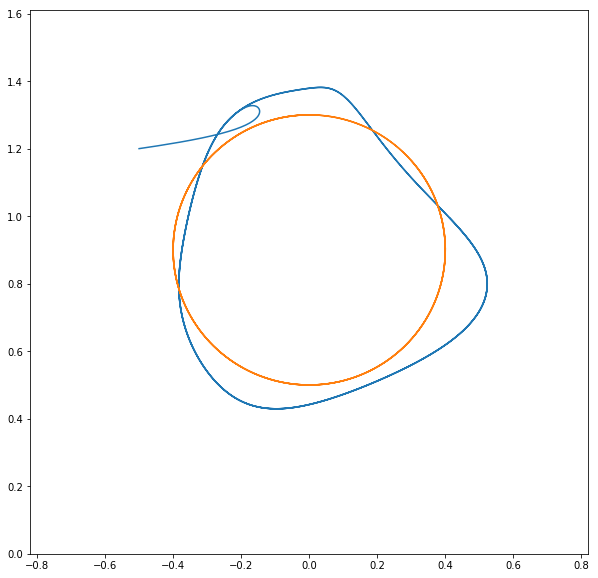

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (10, 10))
plt.plot(y_lyap[:,0], y_lyap[:,1])
plt.plot(yid[:,0], yid[:,1])
plt.xlim((-0.82, 0.82))
plt.ylim((0, 1.61))
plt.show()

# Pretraining

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [10]:
if torch.cuda.is_available():
    use_gpu = True
    print("Using GPU")
else:
    use_gpu = False
FloatTensor = torch.cuda.FloatTensor if use_gpu else torch.FloatTensor
LongTensor = torch.cuda.LongTensor if use_gpu else torch.LongTensor
ByteTensor = torch.cuda.ByteTensor if use_gpu else torch.ByteTensor
Tensor = FloatTensor

Using GPU


In [11]:
model = nn.Sequential(
        nn.Linear(8, 16),
        nn.Sigmoid(),
        nn.Linear(16, 16),
        nn.Sigmoid(),
        nn.Linear(16, 2),
)

# model = nn.Linear(8, 2)
if use_gpu:
    model.cuda()

In [12]:
def loss_pretrain(target, predicted):
    return ((target - predicted)**2).sum()

In [13]:
DotQuan = 1800
Time = 900

tm = [0, Time]
y0 = array([-0.5, 1.2, 0.0, 0.0])
listK = array([0.12, 0.68])

def get_batches_pretrain(trajectory, batch_size, batch_num):
    for n_batch in range(batch_num):
        time = np.random.rand(batch_size)*Time
        wanted = np.array([trajectory(t) for t in time])
        real = np.random.rand(batch_size, 4)*1.6 - np.array([0.8, 0, 0.8, 0.8])
        inp = np.hstack((real, wanted))
        out = np.array([Lyapunov_control(*state, listK) for state in inp])

        if use_gpu:
            inp, out = Tensor(inp).cuda(), Tensor(out).cuda()
        else:
            inp, out = Tensor(inp), Tensor(out)
        yield inp, out

In [14]:
n_epochs = 60
batch_size = 32
batch_num = 1
opt = torch.optim.Adam(model.parameters(), 1e-4)

def pretraining(model, optimizer, n_epochs = n_epochs, batch_size = batch_size, batch_num = batch_num):
    model.train(True)
    for epoch in tqdm(range(n_epochs)):
        for x, y in get_batches_pretrain(circle, batch_size, batch_num):
            opt.zero_grad()
            y_pred = model(x)
            loss = loss_pretrain(y, y_pred)
            loss.backward()
            optimizer.step()
    return model 

In [16]:
m = pretraining(model, opt, 10000, 256, 1)

100%|██████████| 10000/10000 [00:27<00:00, 364.55it/s]


In [30]:
def control_kek(*state, param = None):
    state_t = Tensor(np.array(state[:8])).cuda()
    res = m(state_t)
    res = res.cpu().data.numpy()
    if param is not None:
        res += np.random.normal(scale = param, size = 2)
    return res

In [223]:
for name, param in m.named_parameters():
    if param.requires_grad:
        print(name, param.data)

0.weight tensor([[-0.1576, -0.1159,  0.3528,  ...,  0.1328,  0.0202,  0.2204],
        [-0.1324,  0.2135, -0.2337,  ..., -0.0605, -0.1919, -0.1961],
        [ 0.1491,  0.1215, -0.1739,  ...,  0.0412,  0.2921,  0.2743],
        ...,
        [ 0.2671,  0.1840, -0.3439,  ..., -0.3466,  0.1451, -0.2888],
        [-0.0726,  0.0368,  0.0370,  ...,  0.2384,  0.2044, -0.0890],
        [ 0.1279,  0.3489,  0.2063,  ..., -0.1916,  0.2977,  0.2198]],
       device='cuda:0')
0.bias tensor([ 0.0809, -0.2488,  0.1001, -0.0690, -0.1387, -0.3311, -0.3290, -0.1451,
         0.3351,  0.1223,  0.1923,  0.2968, -0.0310,  0.3496,  0.3302, -0.1985,
         0.2900,  0.1857,  0.0063, -0.0596,  0.0484, -0.0911,  0.3224, -0.0342,
         0.2230,  0.1153,  0.0616, -0.0264, -0.0795,  0.1006,  0.2069,  0.0888,
        -0.0148,  0.0417,  0.0807,  0.0794,  0.2958,  0.3249, -0.0820, -0.3367,
         0.2435, -0.1120, -0.2889,  0.0013,  0.0151,  0.0979, -0.1366, -0.1078,
         0.0757,  0.0740, -0.3317, -0.2748,  0

In [18]:
[T, y] = ode4(motion,tm,y0,[DotQuan, listK],circle, control_kek);

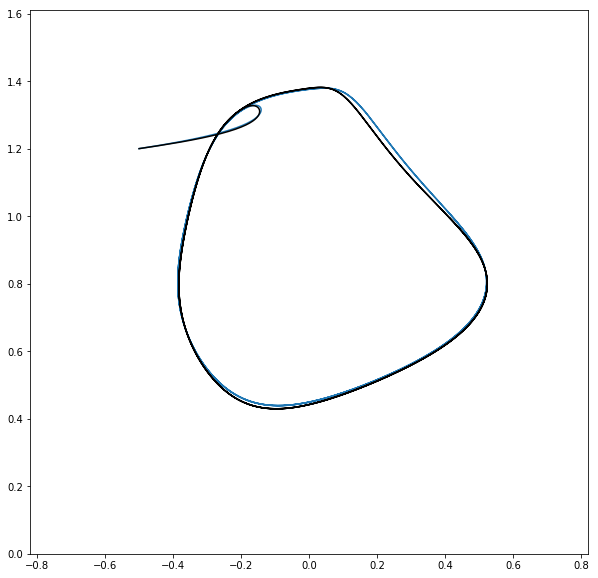

In [19]:
plt.figure(figsize = (10, 10))
plt.plot(y[:,0], y[:,1])
plt.plot(y_lyap[:,0], y_lyap[:,1], color = "black")
plt.xlim((-0.82, 0.82))
plt.ylim((0, 1.61))
plt.show()

# Training

In [35]:
steps = 40
DotQuan = 1800
Time = 900
h = Time / DotQuan

tm = [0, Time]
y0 = array([-0.5, 1.2, 0.0, 0.0])
listK = array([0.12, 0.68])

def gen_session(model, trajectory, control, length, disp, y0 = y0):
    traj_disc = np.array([trajectory(t) for t in np.arange(0, Time + 1e-12, h)] )  
    path = np.zeros((length, 4))
    path[0] = y0
    for i in range(1, length + 1):
        arg = np.hstack((path[i-1], traj_disc[i]))
#         print(control(arg))
#         [ax, ay] = control(arg) + np.random.normal(scale = disp, size = 2)
        _, state = ode4(motion, tspan = [(i-1)*h, i*h], y0 = path[i-1], param = disp, trajectory = trajectory, control = control)
        path[i] = state
    loss = np.linalg.norm(path, traj_disc)
    return path, loss

In [36]:
gen_session(m, circle, control_kek, 10, 0.01, y0)

TypeError: cannot unpack non-iterable float object